In [74]:
J = 0.2389 # kg*m^2 Solid Works measured
m_endLoad = 0.75 # kg # approx
#m_beam = 2.5 - 1.5 # kg # approx
m_beam = 2.34312 - 2*m_endLoad # kg # SolidWorks approx
#J = 2 * m_endLoad*(0.35**2) + (1/12)*(m_beam)*(0.70**2) # 2*J_load * J_beam # approximated
print('J = %.4f kg*m^2' % J)

alpha = 0.4 # rad/s^2
omega_max = 1.0 # rad/s

torque = J * alpha

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')

SF = 5
P_motor = P_max * SF
print(f'P_motor = {P_motor:.4f} W')


J = 0.2389 kg*m^2
P_max = 0.0956 W
P_motor = 0.4778 W


In [75]:
import math

rated_speed = 120 # RPM
rated_omega = rated_speed * 2 * math.pi / 60

NoLoad_speed = 7000 / 49 # RPM
NoLoad_omega = NoLoad_speed * 2 * math.pi / 60

print(f'rated_omega = {rated_omega:.4f} rad/s')
print(f'NoLoad_omega = {NoLoad_omega:.4f} rad/s')

P_max_rated = torque * rated_omega
print(f'P_max_rated = {P_max_rated:.4f} W')


rated_omega = 12.5664 rad/s
NoLoad_omega = 14.9600 rad/s
P_max_rated = 1.2008 W


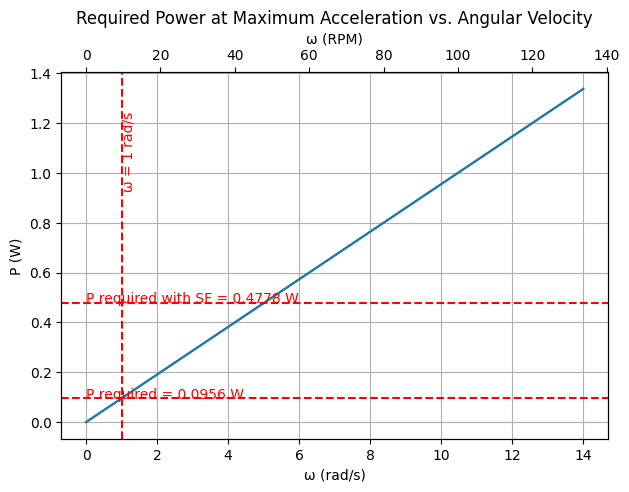

In [76]:
# plot required power vs. omega from 0 to 5 rad/s
# also add two x axses for unit rad/s and rpm
import numpy as np
import matplotlib.pyplot as plt

omega = np.linspace(0, 14, 100)
P = torque * omega
P_SF = P * SF

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('ω (rad/s)')
ax1.set_ylabel('P (W)')
plt.grid()
ax1.plot(omega, P, color=color)

plt.axvline(x=1, color='r', linestyle='--')
plt.text(1, max(P)*0.7, 'ω = 1 rad/s', color='r', rotation=90)

ax2 = ax1.twiny()
ax2.set_xlabel('ω (RPM)')
ax2.plot(omega * 60/(2*np.pi), P)
ax2.tick_params(axis='x')

plt.axhline(y=P_motor, color='r', linestyle='--')
plt.text(0, P_motor, f'P required with SF = {P_motor:.4f} W', color='r')

plt.axhline(y=P_max, color='r', linestyle='--')
plt.text(0, P_max, f'P required = {P_max:.4f} W', color='r')

fig.tight_layout()
plt.title('Required Power at Maximum Acceleration vs. Angular Velocity')
plt.show()


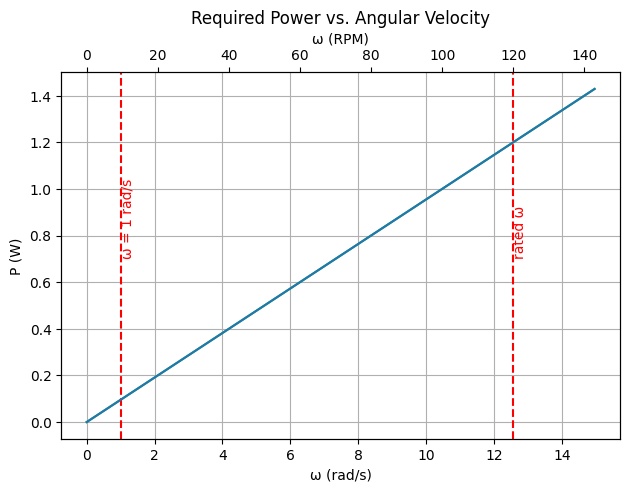

In [77]:
# Define the range for omega from 0 to NoLoad_omega
omega_range = np.linspace(0, NoLoad_omega, 1000)

# Calculate the required power for the new omega range
P_new = torque * omega_range

# Plot the graph
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('ω (rad/s)')
ax1.set_ylabel('P (W)')
plt.grid()
ax1.plot(omega_range, P_new, color=color)

# Add red lines at omega = 1 rad/s and rated_omega
plt.axvline(x=1, color='r', linestyle='--')
plt.text(1, max(P_new)/2, 'ω = 1 rad/s', color='r', rotation=90)

plt.axvline(x=rated_omega, color='r', linestyle='--')
plt.text(rated_omega, max(P_new)/2, 'rated ω', color='r', rotation=90)

# Add the second x-axis for RPM
ax2 = ax1.twiny()
ax2.set_xlabel('ω (RPM)')
ax2.plot(omega_range * 60/(2*np.pi), P_new)
ax2.tick_params(axis='x')


fig.tight_layout()
plt.title('Required Power vs. Angular Velocity')
plt.show()

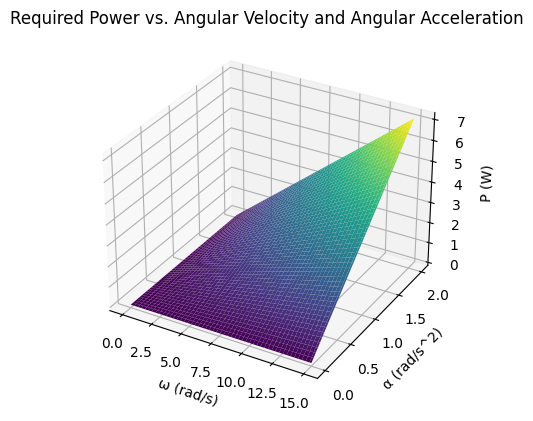

In [78]:
# plot 3d graph of required power vs omega from 0 to 600 rad/s and alpha from 0 to 10 rad/s^2

from mpl_toolkits.mplot3d import Axes3D

# Define the range for omega and alpha
omega_range = np.linspace(0, 15, 100)
alpha_range = np.linspace(0, 2, 100)

# Create a meshgrid for omega and alpha
omega_mesh, alpha_mesh = np.meshgrid(omega_range, alpha_range)

# Calculate the required power
P_mesh = J * alpha_mesh * omega_mesh

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(omega_mesh, alpha_mesh, P_mesh, cmap='viridis')

ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('α (rad/s^2)')
ax.set_zlabel('P (W)')
plt.title('Required Power vs. Angular Velocity and Angular Acceleration')

plt.show()

In [ ]:
# Define the range for omega and alpha
omega_range = np.linspace(0, 15, 100)
alpha_range = np.linspace(0, 2, 100)

# Create a meshgrid for omega and alpha
omega_mesh, alpha_mesh = np.meshgrid(omega_range, alpha_range)

# Calculate the required power
P_mesh = J * alpha_mesh * omega_mesh

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(omega_mesh, alpha_mesh, P_mesh, cmap='viridis')

# Add a red transparent plane at alpha = 0.4 rad/s^2
alpha_plane = 0.4
P_plane = J * alpha_plane * omega_mesh
ax.plot_surface(omega_mesh, alpha_plane, P_plane, color='red', alpha=0.5)

ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('α (rad/s^2)')
ax.set_zlabel('P (W)')
plt.title('Required Power vs. Angular Velocity and Angular Acceleration')

plt.show()

Prismatic

In [79]:
r_pulley = 6.37 / 1000 # m
m_endLoad = 0.75 # kg # approx
m_load  = 2 * m_endLoad # kg # assumed

a = 0.250 # m/s^2 # requirement
v_max = 0.500 # m/s # requirement

omega_max = v_max / r_pulley

torque = m_load * a * r_pulley # approx without belt tension

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')

SF = 5
P_motor = P_max * SF
print(f'P_motor = {P_motor:.4f} W')



P_max = 0.1875 W
P_motor = 0.9375 W


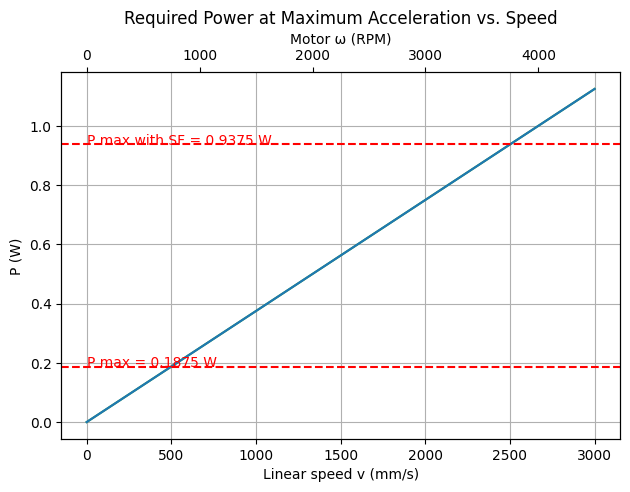

In [80]:
# plot required power vs. omega or speed from 0 to 2.000 m/s
# also add two x axses for unit mm/s and rpm

def P_at_omega(omega):
    return (m_load * a * r_pulley) * omega

def P_at_v(v):
    return (m_load * a * r_pulley) * (v / r_pulley)

v = np.linspace(0, 3.0, 1000)
v_mm = v * 1000
P = P_at_v(v)

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Linear speed v (mm/s)')
ax1.set_ylabel('P (W)')
ax1.plot(v_mm, P, color=color)

ax1.tick_params(axis='y')
plt.grid()

ax2 = ax1.twiny()
ax2.set_xlabel('Motor ω (RPM)')
ax2.plot(v * 60/(2*np.pi*r_pulley), P)
ax2.tick_params(axis='x')

plt.axhline(y=P_motor, color='r', linestyle='--')
plt.text(0, P_motor, f'P max with SF = {P_motor:.4f} W', color='r')

plt.axhline(y=P_max, color='r', linestyle='--')
plt.text(0, P_max, f'P max = {P_max:.4f} W', color='r')

fig.tight_layout()
plt.title('Required Power at Maximum Acceleration vs. Speed')
plt.show()

In [81]:
rated_speed = 1400 # RPM
rated_v = rated_speed * 2 * math.pi * r_pulley / 60
rated_omega = rated_speed * 2 * math.pi / 60

print(f'rated_v = {rated_v:.4f} m/s')
print(f'rated_omega = {rated_omega:.4f} rad/s')

P_at_omega(rated_omega)

rated_v = 0.9339 m/s
rated_omega = 146.6077 rad/s


0.3502090410589221